In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks
from sklearn.metrics import mutual_info_score
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns

matplotlib.rc('figure', figsize=(18, 4))

In [33]:
data = pd.read_csv('TrozoG.txt', delimiter='\t', header=None, skiprows = range(3), decimal = ",", index_col = False)

In [34]:
print(len(data))
data.drop(columns=[3], inplace=True)
data.columns = ['LP','VD','TiempoGABA']
data = data.apply(pd.to_numeric)
# data['Time'] = data.index*0.1
data['Time'] = data.index
print(data.head())

# Sample interval = 0,100000
# Number of channels = 3
# Number of samples per channel = 16384000

16384000
         LP        VD  TiempoGABA  Time
0 -0.006104  0.064697    0.120239     0
1 -0.004272  0.075989    0.126343     1
2 -0.003357  0.087280    0.125427     2
3 -0.005188  0.092468    0.123596     3
4 -0.007324  0.093384    0.118713     4


In [35]:
data.dropna(axis=0, how='any',inplace=True)
data.isnull().sum()

LP            0
VD            0
TiempoGABA    0
Time          0
dtype: int64

In [36]:
data.describe()

,LP,VD,TiempoGABA,Time
count,1.638400e+07,1.638400e+07,1.638400e+07,1.638400e+07
mean,1.782227e-11,4.330900e-02,1.361662e-01,8.192000e+06
std,8.109792e-02,3.337760e-02,2.849763e-01,4.729654e+06
min,-6.420900e-01,-3.088380e-01,-5.462600e-02,0.000000e+00
25%,-2.624500e-02,3.326400e-02,1.141360e-01,4.096000e+06
50%,0.000000e+00,4.303000e-02,1.199340e-01,8.192000e+06
75%,2.441400e-02,5.310100e-02,1.260380e-01,1.228800e+07
max,9.265140e-01,5.520630e-01,5.220642e+00,1.638400e+07


In [71]:
lp_mean = np.mean(data.LP)
lp_sd = np.std(data.LP)
low_lp, high_lp = lp_mean-2*lp_sd, lp_mean+2*lp_sd
print('LP:\n\tMean: %f\n\tSD: %f\n\tLow: %f\n\tHigh: %f'%(lp_mean,lp_sd,low_lp,high_lp))

vd_mean = np.mean(data.VD)
vd_sd = np.std(data.VD)
low_vd, high_vd = vd_mean-2*vd_sd, vd_mean+2*vd_sd
print('VD:\n\tMean: %f\n\tSD: %f\n\tLow: %f\n\tHigh: %f'%(vd_mean,vd_sd,low_vd,high_vd))


low_vd2, high_vd2 = vd_mean-2*vd_sd, vd_mean+2*vd_sd
low_lp2, high_lp2 = lp_mean-2*lp_sd, lp_mean+2*lp_sd




LP:
	Mean: 0.000000
	SD: 0.081098
	Low: -0.162196
	High: 0.162196
VD:
	Mean: 0.043309
	SD: 0.033378
	Low: -0.023446
	High: 0.110064


Text(0.08668659525254256, 50000.0, '0.08')

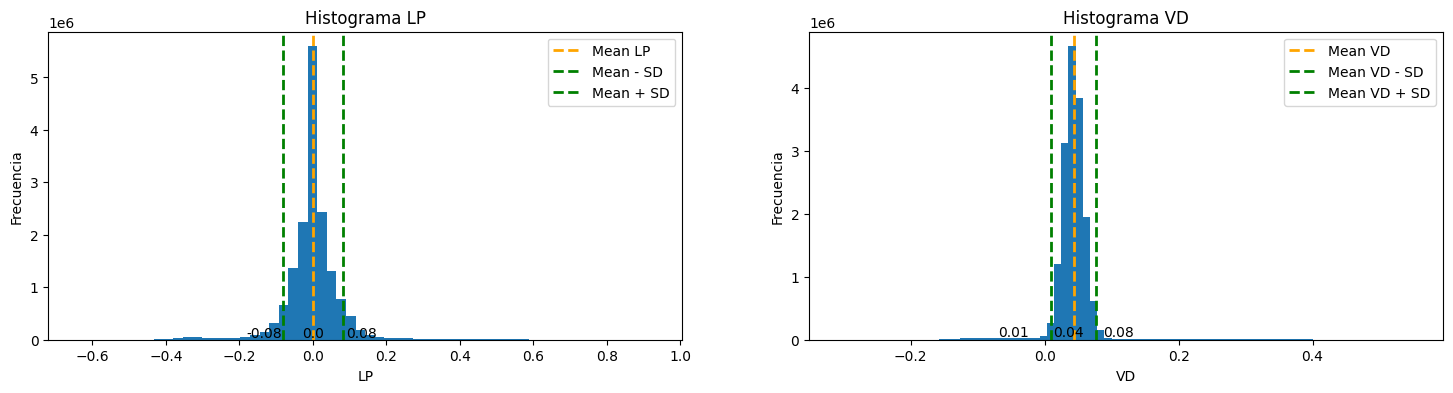

In [38]:
plt.subplot(1,2,1)
plt.hist(data.LP, bins=60)
plt.axvline(x = lp_mean, color='orange', linestyle='--', linewidth=2, label = 'Mean LP')
plt.axvline(x = low_lp, color='g', linestyle='--', linewidth=2, label = 'Mean - SD')
plt.axvline(x = high_lp, color='g', linestyle='--', linewidth=2, label = 'Mean + SD')
plt.title('Histograma LP')
plt.xlabel('LP')
plt.ylabel('Frecuencia')
plt.legend()
plt.annotate(str(round(lp_mean,2)),(lp_mean -0.03,0.05e6))
plt.annotate(str(round(low_lp,2)),(low_lp - 0.1,0.05e6))
plt.annotate(str(round(high_lp,2)),(high_lp + 0.01,0.05e6))

plt.subplot(1,2,2)
plt.hist(data.VD, bins=80)
plt.axvline(x = vd_mean, color='orange', linestyle='--', linewidth=2, label = 'Mean VD')
plt.axvline(x = low_vd, color='g', linestyle='--', linewidth=2, label = 'Mean VD - SD')
plt.axvline(x = high_vd, color='g', linestyle='--', linewidth=2, label = 'Mean VD + SD')
plt.title('Histograma VD')
plt.xlabel('VD')
plt.ylabel('Frecuencia')
plt.legend()
plt.annotate(str(round(vd_mean,2)),(vd_mean + -0.03,+0.05e6))
plt.annotate(str(round(low_vd,2)),(low_vd  - 0.08,+0.05e6))
plt.annotate(str(round(high_vd,2)),(high_vd + 0.01,+0.05e6))

In [39]:
data.head()

,LP,VD,TiempoGABA,Time
0,-0.006104,0.064697,0.120239,0
1,-0.004272,0.075989,0.126343,1
2,-0.003357,0.087280,0.125427,2
3,-0.005188,0.092468,0.123596,3
4,-0.007324,0.093384,0.118713,4


C:\Users\marlo\AppData\Local\Temp\ipykernel_11996\2652766695.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]
C:\Users\marlo\AppData\Local\Temp\ipykernel_11996\2652766695.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]


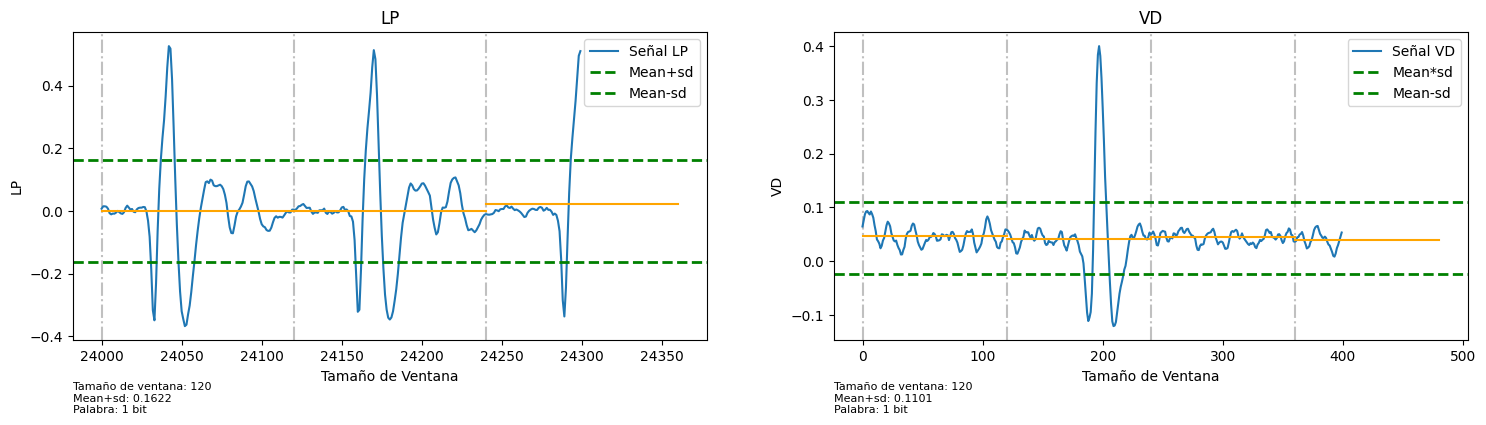

In [83]:
break_size = 120
data_init = 24000
data_end = 24300

data2 = data
data2 = data2.iloc[data_init:data_end]
breaks = np.arange(data_init,data_end,break_size)
data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]

d = data2.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
d['min_x'] = d['breaks']
d['amx_x'] = d['breaks'] + break_size

plt.subplot(1,2,1)
for i in breaks[breaks<=data_end]:
    plt.axvline(x=i, color = 'silver', linestyle = '-.')

plt.plot(data2.Time, data2.LP, label = 'Señal LP')
plt.axhline(y = high_lp, color='g', linestyle='--', linewidth=2, label = 'Mean+sd')
plt.axhline(y = low_lp, color='g', linestyle='--', linewidth=2, label = 'Mean-sd')
plt.title('LP')
plt.xlabel('Tamaño de Ventana')
plt.ylabel('LP')
plt.legend()
plt.annotate('Tamaño de ventana: '+ str(break_size) + '\nMean+sd: '+ str(round(high_lp,4)) + '\nPalabra: 1 bit', (0,0), (0,-30), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')

for i in range(len(d)):
    c = None
    if d.iloc[i,1] < low_lp:
        c = 'blue'
    elif d.iloc[i,1] >= low_lp and d.iloc[i,1] <= high_lp:
        c = 'orange'
    else:
        c = 'red'
    plt.plot([d.iloc[i,3],d.iloc[i,4]],[d.iloc[i,1], d.iloc[i,1]], color = c)


break_size = 120
data_init = 0
data_end = 400

data2 = data
data2 = data2.iloc[data_init:data_end]
breaks = np.arange(data_init,data_end,break_size)
data2['breaks'] = np.repeat(breaks,break_size)[0:data_end-data_init]

d = data2.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
d['min_x'] = d['breaks']
d['amx_x'] = d['breaks'] + break_size

plt.subplot(1, 2, 2)
for i in breaks[breaks<=data_end]:
    plt.axvline(x=i, color = 'silver', linestyle = '-.')
plt.plot(data2.Time, data2.VD, label = 'Señal VD')
plt.axhline(y = high_vd, color='g', linestyle='--', linewidth=2, label =  'Mean*sd')
plt.axhline(y = low_vd, color='g', linestyle='--', linewidth=2, label = 'Mean-sd')
plt.title('VD')
plt.xlabel('Tamaño de Ventana')
plt.ylabel('VD')
plt.legend()
plt.annotate('Tamaño de ventana: '+ str(break_size) + '\nMean+sd: '+ str(round(high_vd,4)) + '\nPalabra: 1 bit', (0,0), (0,-30), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')

for i in range(len(d)):
    c = None
    if d.iloc[i,2] < low_vd:
        c = 'blue'
    elif d.iloc[i,2] >= low_vd and d.iloc[i,2] <= high_vd:
        c = 'orange'
    else:
        c = 'red'
    plt.plot([d.iloc[i,3],d.iloc[i,4]],[d.iloc[i,2], d.iloc[i,2]], color = c)

In [41]:
# for p in range(1,9):
#     palabra = p
#     breaks = np.arange(0,len(data),palabra)
#     data.loc[:,'W'+str(p)] = np.repeat(breaks,palabra)[0:len(data)]

# data.head()

In [72]:
def apply_sax_lp(val):
    if val < low_lp:
        return 'a'
    elif val >= low_lp and val <= high_lp:
        return 'b'
    else:
        return 'c'
    
def apply_sax_vd(val):
    if val < low_vd:
        return 'a'
    elif val >= low_vd and val <= high_vd:
        return 'b'
    else:
        return 'c'
    

def get_spikes_lp(val):

    spikes_lp = val[find_peaks(val)[0]]>high_lp2

    if spikes_lp.any():
        return True
    else:
        return False
    
def get_spikes_vd(val):
    spikes_vd = val[find_peaks(val)[0]]>high_vd2

    if spikes_vd.any():
        return True
    else:
        return False
    
    

In [13]:
# data_palabras = list()

# for i in data.columns[4:len(data.columns)]:
#     d = data.groupby(i)[['LP','VD']].agg('mean').reset_index()

#     d['CodLP'] = d['LP'].apply(apply_sax_lp)
#     d['CodVD'] = d['VD'].apply(apply_sax_vd)
#     data_palabras.append(d)

#     print('Tamaño de Palabra: %s\nDimensión dataframe: %s'%(str(i),str(d.shape)))
#     print(d.head(3))
#     print('\n')

In [81]:
window_sizes_w = np.arange(60,120,5)

df_w_MI = []
# df_entropy_lp_a_vd = []
# df_entropy_vd_a_lp = []

spikes_lp = find_peaks(data['LP'])[0]
spikes_vd = find_peaks(data['VD'])[0]

list_br = list()

for win_size in window_sizes_w:
    breaks = np.arange(0,len(data),win_size)
    d = data
    d.loc[:,'breaks'] = np.repeat(breaks,win_size)[0:len(d)]
    data2 = d
    d = d.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
    d2 = data2.groupby('breaks')[['LP', 'VD']].agg('max').reset_index()
    # d3 = data2.groupby('breaks')[['VD']].agg('max').reset_index()

    d['CodLP'] = d['LP'].apply(apply_sax_lp)
    d['CodVD'] = d['VD'].apply(apply_sax_vd)
    d2['IsSpikeLP'] = d2['LP'] > high_lp2
    d2['IsSpikeVD'] = d2['VD'] > high_vd2

    d['to_binLP']= d['LP'].apply(lambda x: 1 if x == 'c' else 0)
    d['to_binVD']= d['VD'].apply(lambda x: 1 if x == 'c' else 0)

    print(not (False in d['to_binLP'] == d2['IsSpikeLP']) and not(False in d['to_binVD'] == d2['IsSpikeVD']))


    MI = mutual_info_score(d['CodLP'], d['CodVD'])/win_size
    # Slp = stats.entropy(d['CodLP'])
    # Svd = stats.entropy(d['CodVD'])

    df_w_MI.append(MI)    
    # df_entropy_lp_a_vd.append(MI/Svd)
    # df_entropy_vd_a_lp.append(MI/Slp)



True
True
True
True
True
True
True
True
True
True
True
True


In [73]:
win_size = 10
breaks = np.arange(0,len(data),win_size)
d = data
d.loc[:,'breaks'] = np.repeat(breaks,win_size)[0:len(d)]
data2 = d
d = d.groupby('breaks')[['LP','VD']].agg('mean').reset_index()
d2 = data2.groupby('breaks')[['LP', 'VD']].agg('max').reset_index()
# d3 = data2.groupby('breaks')[['VD']].agg('max').reset_index()

d['CodLP'] = d['LP'].apply(apply_sax_lp)
d['CodVD'] = d['VD'].apply(apply_sax_vd)
d2['IsSpikeLP'] = d2['LP'] > high_lp2
d2['IsSpikeVD'] = d2['VD'] > high_vd2

# d['CodLP'] = d['LPmean'].apply(get_spikes_lp)
# d['CodVD'] = d['VD'].apply(apply_sax_vd)

# d2['LP'] = d2['']

In [78]:
# data['LP'][1:1000]

d['to_binLP']= d['LP'].apply(lambda x: 1 if x == 'c' else 0)
d['to_binVD']= d['VD'].apply(lambda x: 1 if x == 'c' else 0)

print(not (False in d['to_binLP'] == d2['IsSpikeLP']))
print(not(False in d['to_binVD'] == d2['IsSpikeVD']))
#Con esto vemos que la codificación es equivalente marcando los spikes en los mismos puntos

True
True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


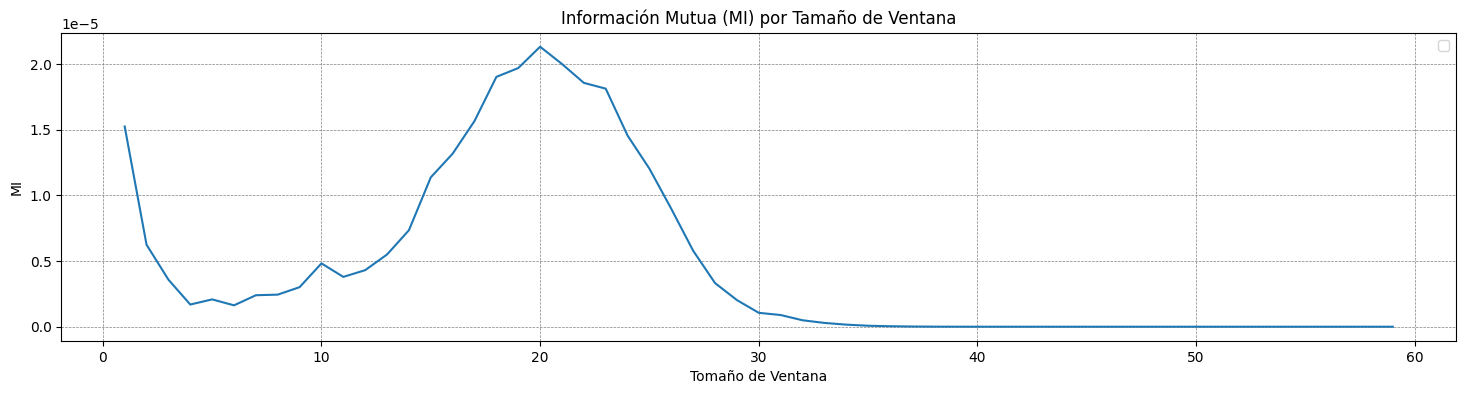

In [20]:

plt.plot(window_sizes_w, df_w_MI)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Información Mutua (MI) por Tamaño de Ventana')
plt.xlabel('Tomaño de Ventana')
plt.ylabel('MI')
plt.legend()